In [14]:
from standardInclude import *

In [15]:
fold = r.TFile("./data/gm2nearline_ana_threshold500.root")
fnew = r.TFile("./data/gm2nearline_ana_threshold100.root")

In [16]:
told = fold.Get("nearlineHistTree").Get("eventTree")
tnew = fnew.Get("nearlineHistTree").Get("eventTree")

In [17]:
hold = r.TH2D("hold","Energy v. Time of 500 Threshold Clusters", 600,0,1000,400,0,4000)
hnew = r.TH2D("hnew","Energy v. Time of 100 Threshold Clusters", 600,0,1000,400,0,4000)

In [18]:
condition = "caloNum == 6"
told.Draw("energy:time*1.25/1000>>hold",condition,"goff")
tnew.Draw("energy:time*1.25/1000>>hnew",condition,"goff")

13627

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


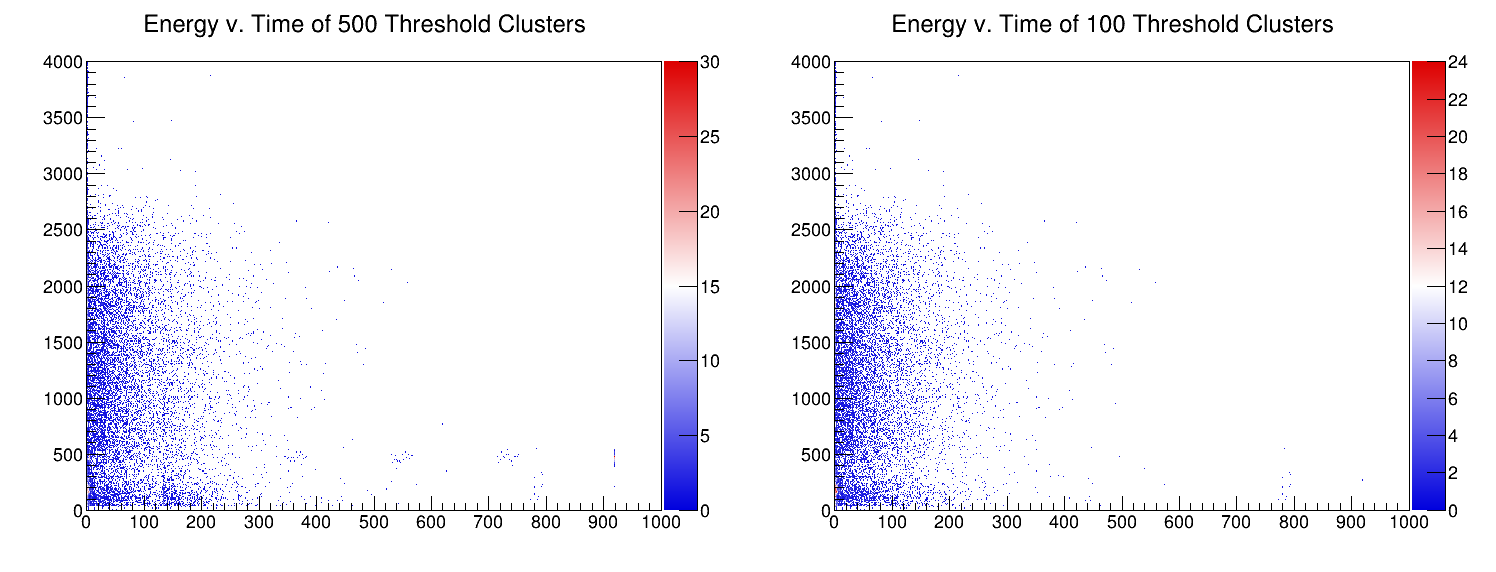

In [19]:
c = r.TCanvas("c","c",1500,600)
c.Divide(2)
c.cd(1)
hold.Draw("colz")
c.cd(2)
hnew.Draw("colz")
c.Draw()

In [20]:
hdiff = hold.Clone("hdiff")
hdiff.SetTitle("500 Clusters - 100 Clusters")
hdiff.Add(hnew,-1)

True

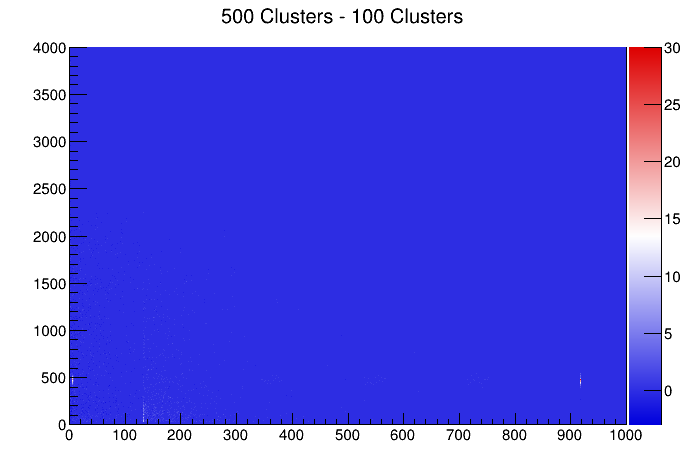

In [21]:
c = r.TCanvas()
hdiff.Draw("colz")
c.Draw()

In [22]:
from array import array

def set_palette(name="palette", ncontours=999): #http://ultrahigh.org/2007/08/making-pretty-root-color-palettes/

    setPalette = True
    
    if name == "gray" or name == "grayscale":
        stops = [0.00, 0.34, 0.61, 0.84, 1.00]
        red   = [1.00, 0.84, 0.61, 0.34, 0.00]
        green = [1.00, 0.84, 0.61, 0.34, 0.00]
        blue  = [1.00, 0.84, 0.61, 0.34, 0.00]
    elif name == "bidir":
        stops = [0.00, 0.50, 1.00]
        red   = [0.00, 1.00, 0.87]
        green = [0.00, 1.00, 0.00]
        blue  = [0.87, 1.00, 0.00]
    else:
        setPalette = False

    if(setPalette):
        s = array('d', stops)
        r1 = array('d', red)
        g = array('d', green)
        b = array('d', blue)

        npoints = len(s)
        r.TColor.CreateGradientColorTable(npoints, s, r1, g, b, ncontours)
        r.gStyle.SetNumberContours(ncontours)
    else:
        #restore defaults
        r.gStyle.SetPalette(1)

In [23]:
set_palette("bidir",999)


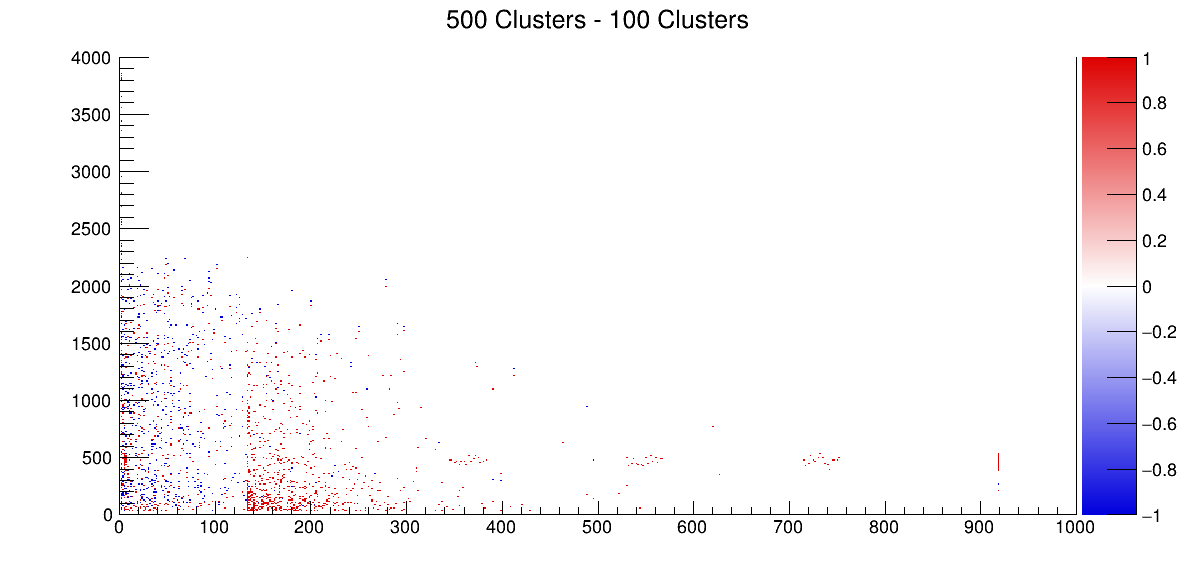

In [24]:
c = r.TCanvas("c","c",1200,600)
hdiff.GetZaxis().SetRangeUser(-1,1)
hdiff.Draw("COLZ")
c.Draw()